In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

dataset = "communities.data"

columns = ['state', 'county', 'community', 'communityname', 'fold', 'population',
           'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
           'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
           'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
           'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
           'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
           'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
           'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
           'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
           'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
           'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
           'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
           'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
           'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
           'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
           'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
           'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart',
           'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc',
           'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet',
           'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
           'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
           'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
           'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
           'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars',
           'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
           'PolicBudgPerPop', 'ViolentCrimesPerPop']


In [ ]:
df = pd.read_csv(dataset, header=None, names=columns)
non_pred = ["state", "county", "community", "communityname", "fold"]
df_cleaned = df.drop(columns = non_pred)

missing_pctg = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
drop_columns = missing_pctg[missing_pctg > 50].index.tolist()
df_cleaned = df_cleaned.drop(columns = drop_columns)

df_cleaned = df_cleaned.fillna(df_cleaned.median)

print(f"Cleaned Dataset Shape: {df_cleaned.shape}")
print(f"Dropped :{len(drop_columns)} columns with > 50% missing values")

Cleaned Dataset Shape: (1994, 123)
Dropped :0 columns with > 50% missing values


In [ ]:
df_arm = pd.DataFrame()

#variables of interest
crime_col = "ViolentCrimesPerPop"
df_arm["Crime_Rate"] = pd.cut(df_cleaned[crime_col], bins = 3, labels =["Low_Crime", "Medium_Crime", "High_Crime"])

poverty_col = "PctPopUnderPov"
df_arm["Poverty_Level"] = pd.cut(df_cleaned[poverty_col], bins = 3, labels = ['Low_Poverty', 'Medium_Poverty', 'High_Poverty'])

educ_col = "PctBSorMore"
df_arm["Education_Level"] = pd.cut(df_cleaned[educ_col], bins = 2, labels = ["Low_Education", "High Education"])

unemp_col = "PctUnemployed"
df_arm["Unemployment_Level"] = pd.cut(df_cleaned[unemp_col], bins = 2, labels = ["Low_Unemployment", "High_Unemployment"])

df_arm["Urban_Type"] = pd.cut(df_cleaned["pctUrban"], bins = 2, labels = ["Rural", "Urban"])



In [ ]:
transactions = []
for index, row in df_arm.iterrows():
  transaction = [str(val) for val in row if pd.notna(val)]
  transactions.append(transaction)

print(f"Total Transactions: {len(transactions)}")

tenc = TransactionEncoder()
tenc_array = tenc.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(tenc_array, columns = tenc.columns_)

print(f"Encoded Dataset Shape:{df_encoded.shape}")

Total Transactions: 1994
Encoded Dataset Shape:(1994, 12)



[EDA 1] Item Frequency Distribution


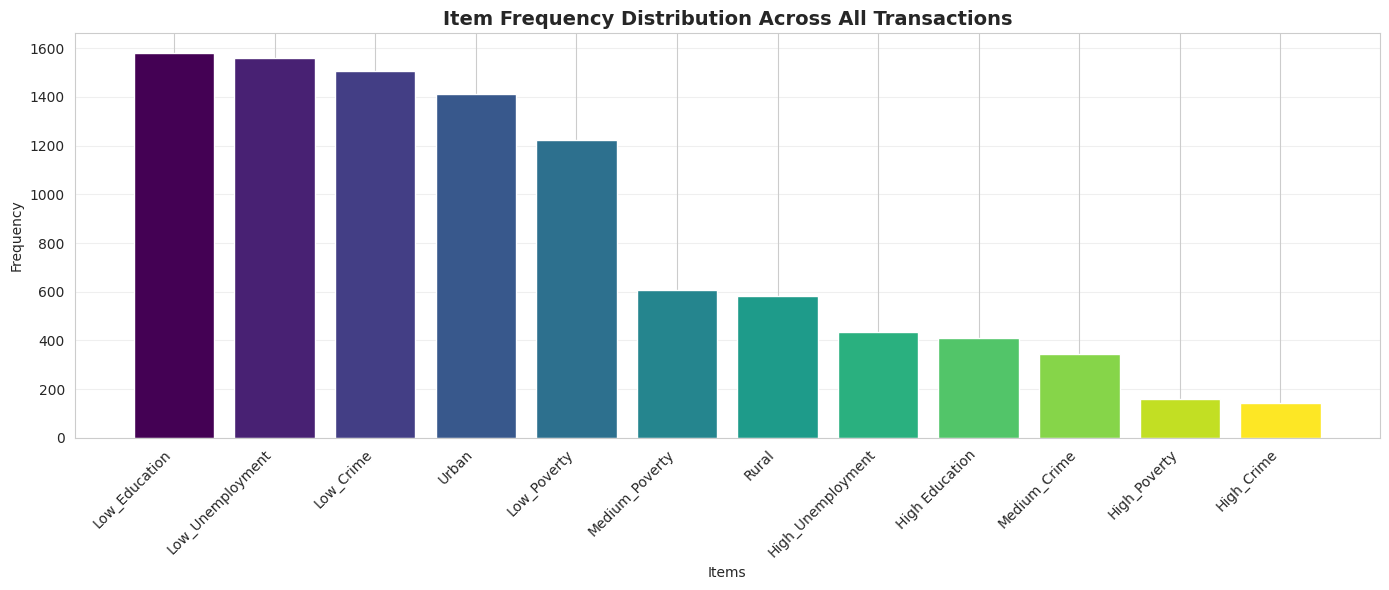


Top 10 Most Frequent Items:
             Item  Frequency  Support
    Low_Education       1582 0.793380
 Low_Unemployment       1561 0.782849
        Low_Crime       1507 0.755767
            Urban       1413 0.708626
      Low_Poverty       1225 0.614343
   Medium_Poverty        609 0.305416
            Rural        581 0.291374
High_Unemployment        433 0.217151
   High Education        412 0.206620
     Medium_Crime        343 0.172016

[EDA 2] Transaction Size Analysis


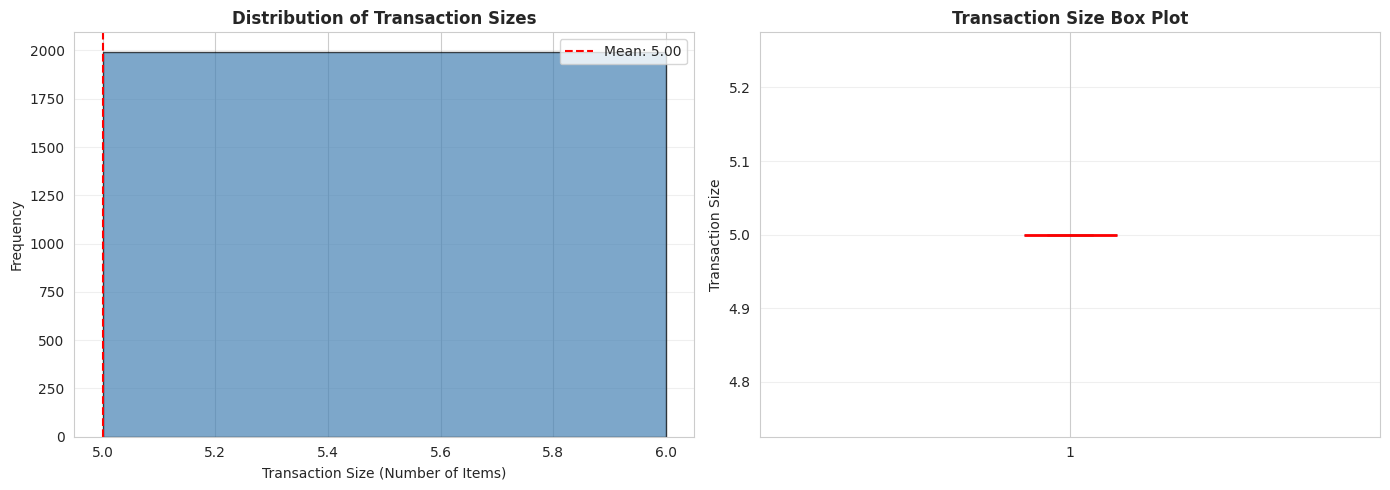


Transaction Size Statistics:
  Mean: 5.00
  Median: 5.00
  Min: 5
  Max: 5
  Std Dev: 0.00

[EDA 3] Item Co-occurrence Heatmap


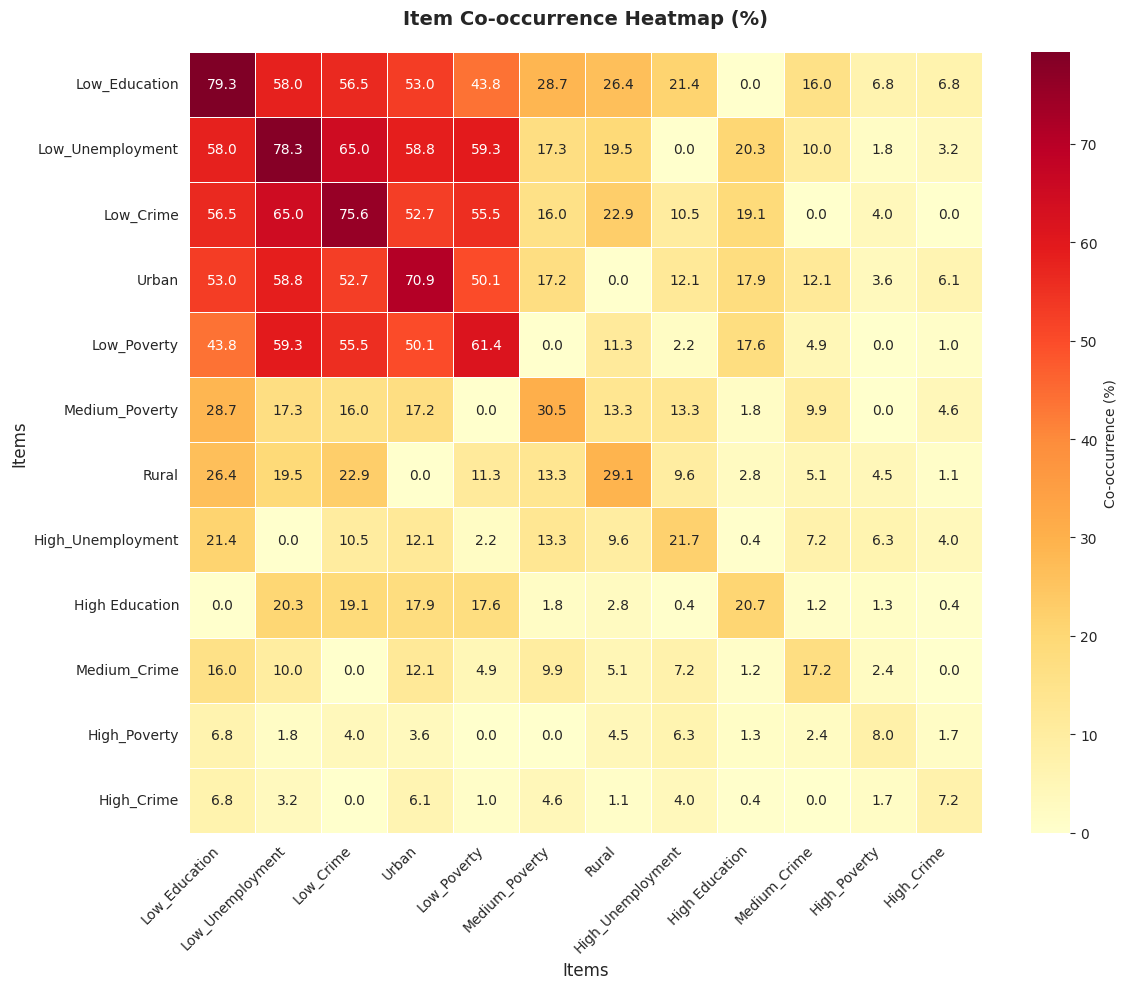

In [ ]:
print("\n[EDA 1] Item Frequency Distribution")
all_items = [item for transaction in transactions for item in transaction]
item_counts = Counter(all_items)
item_freq = pd.DataFrame(item_counts.items(), columns=['Item', 'Frequency'])
item_freq = item_freq.sort_values('Frequency', ascending=False)
item_freq['Support'] = item_freq['Frequency'] / len(transactions)

plt.figure(figsize=(14, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(item_freq)))
plt.bar(range(len(item_freq)), item_freq['Frequency'], color=colors)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequency Distribution Across All Transactions', fontsize=14, fontweight='bold')
plt.xticks(range(len(item_freq)), item_freq['Item'], rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nTop 10 Most Frequent Items:")
print(item_freq.head(10).to_string(index=False))

print("\n[EDA 2] Transaction Size Analysis")
transaction_sizes = [len(t) for t in transactions]
size_counts = Counter(transaction_sizes)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(transaction_sizes, bins=range(min(transaction_sizes), max(transaction_sizes)+2),
             color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Transaction Size (Number of Items)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Transaction Sizes', fontweight='bold')
axes[0].axvline(np.mean(transaction_sizes), color='red', linestyle='--',
                label=f'Mean: {np.mean(transaction_sizes):.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].boxplot(transaction_sizes, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Transaction Size')
axes[1].set_title('Transaction Size Box Plot', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTransaction Size Statistics:")
print(f"  Mean: {np.mean(transaction_sizes):.2f}")
print(f"  Median: {np.median(transaction_sizes):.2f}")
print(f"  Min: {min(transaction_sizes)}")
print(f"  Max: {max(transaction_sizes)}")
print(f"  Std Dev: {np.std(transaction_sizes):.2f}")

print("\n[EDA 3] Item Co-occurrence Heatmap")
items = list(item_freq['Item'])
cooccurrence = np.zeros((len(items), len(items)))

for transaction in transactions:
    for i, item1 in enumerate(items):
        for j, item2 in enumerate(items):
            if item1 in transaction and item2 in transaction:
                cooccurrence[i, j] += 1

cooccurrence_pct = (cooccurrence / len(transactions)) * 100

plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence_pct,
            xticklabels=items,
            yticklabels=items,
            annot=True,
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Co-occurrence (%)'},
            linewidths=0.5)
plt.title('Item Co-occurrence Heatmap (%)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
min_support = 0.05
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

print(f"\nFrequent Itemsets Found: {len(frequent_itemsets)}")
print("\nTop 10 Frequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))


Frequent Itemsets Found: 128

Top 10 Frequent Itemsets:
     support                           itemsets
5   0.793380                    (Low_Education)
7   0.782849                 (Low_Unemployment)
4   0.755767                        (Low_Crime)
11  0.708626                            (Urban)
28  0.650451      (Low_Crime, Low_Unemployment)
6   0.614343                      (Low_Poverty)
38  0.592778    (Low_Poverty, Low_Unemployment)
44  0.587763          (Low_Unemployment, Urban)
33  0.579739  (Low_Unemployment, Low_Education)
26  0.564694         (Low_Crime, Low_Education)


In [ ]:
rules = association_rules(frequent_itemsets,
                         metric="confidence",
                         min_threshold=0.6)

rules = rules.sort_values('lift', ascending=False)

print(f"\nTotal Rules Generated: {len(rules)}")
print("\nTop 10 Rules(All Metrics):")
metrics_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']
print(rules[metrics_cols].head(10).to_string())

crime_rules = rules[rules['consequents'].apply(lambda x: any('Crime' in str(item) for item in x))]
print(f"\n\nRules Predicting Crime Rate: {len(crime_rules)}")
print("\nTop Crime-Related Rules:")
print(crime_rules[metrics_cols].head(15).to_string())


Total Rules Generated: 290

Top 10 Rules(All Metrics):
                                                      antecedents                         consequents   support  confidence      lift  leverage  conviction
56                                  (High_Poverty, Low_Education)                 (High_Unemployment)  0.059679    0.881481  4.059293  0.044977    6.605285
6                                                  (High_Poverty)                 (High_Unemployment)  0.062688    0.781250  3.597719  0.045264    3.578736
58                                                 (High_Poverty)  (High_Unemployment, Low_Education)  0.059679    0.743750  3.481309  0.042536    3.068718
180                                    (Urban, High_Unemployment)     (Low_Education, Medium_Poverty)  0.079739    0.659751  2.295888  0.045008    2.094460
178                     (High_Unemployment, Urban, Low_Education)                    (Medium_Poverty)  0.079739    0.665272  2.178247  0.043132    2.075069
69      

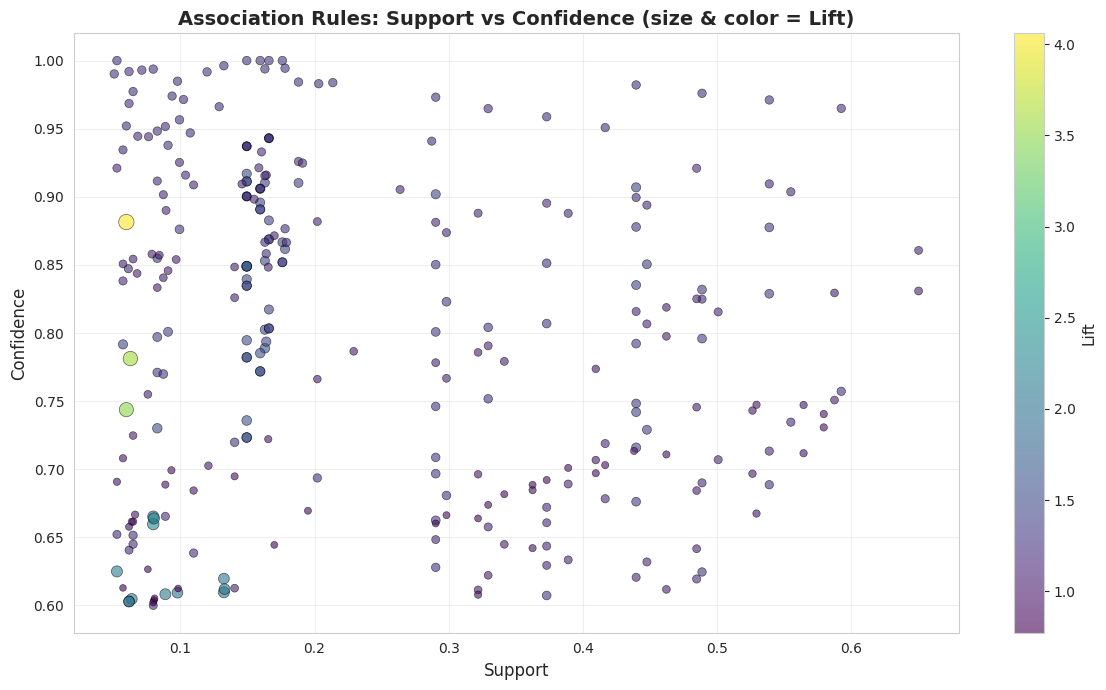

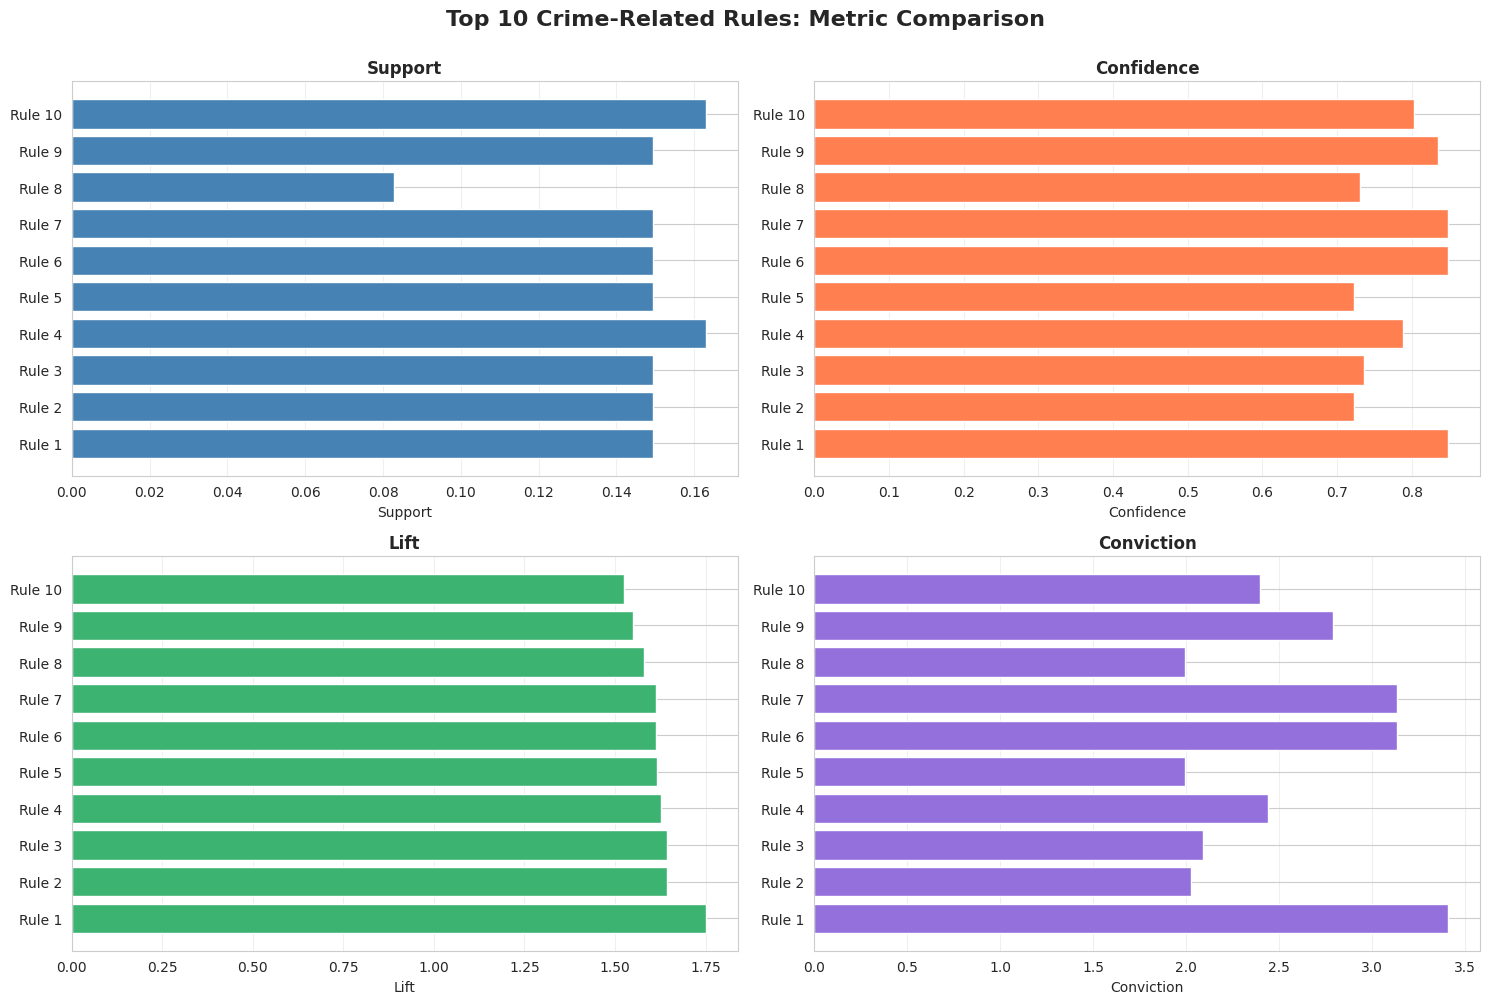

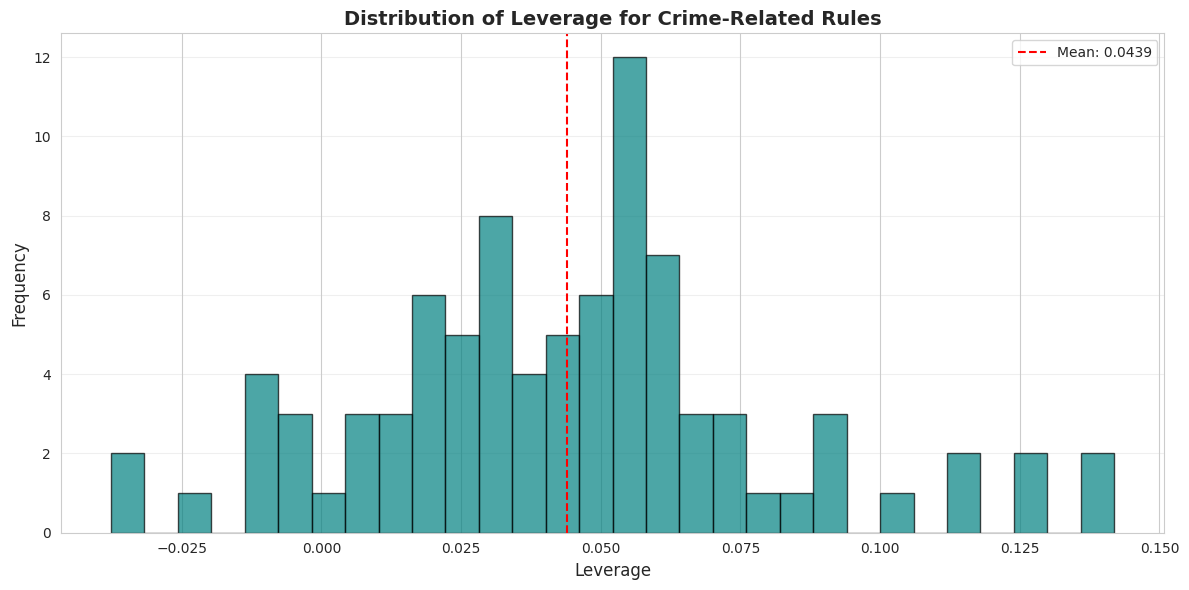

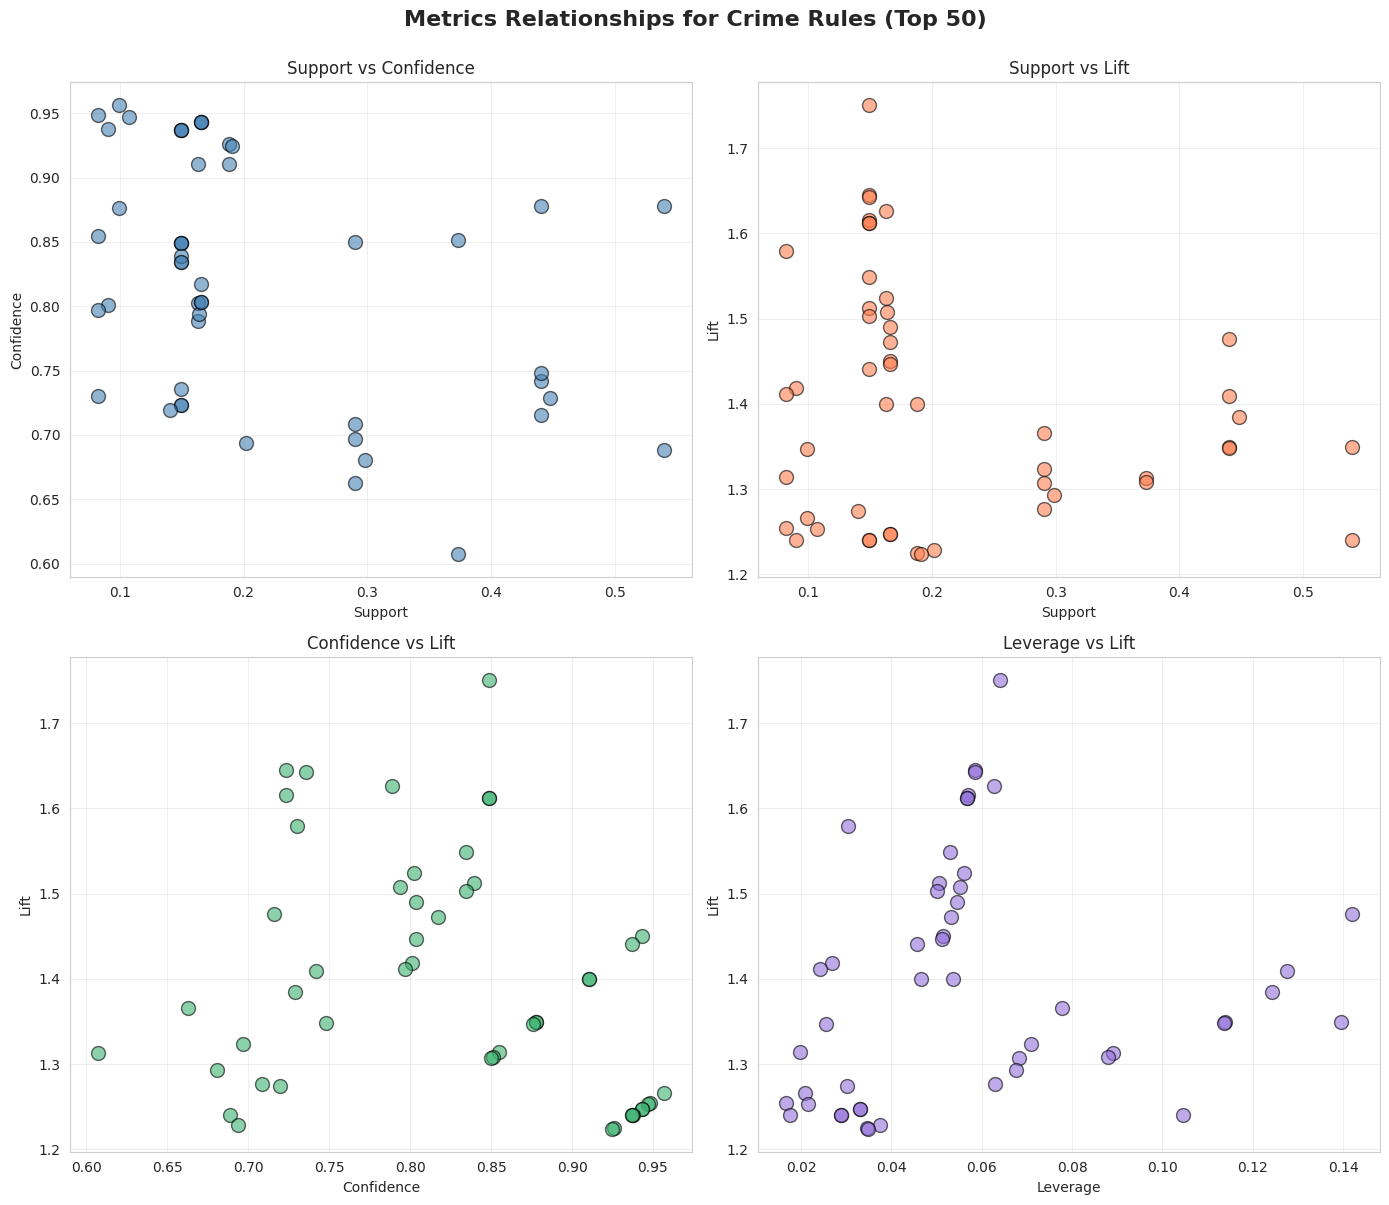

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(rules['support'], rules['confidence'],
                     s=rules['lift']*30, alpha=0.6,
                     c=rules['lift'], cmap='viridis', edgecolors='black', linewidth=0.5)
ax.set_xlabel('Support', fontsize=12)
ax.set_ylabel('Confidence', fontsize=12)
ax.set_title('Association Rules: Support vs Confidence (size & color = Lift)',
             fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Lift', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

top_rules = crime_rules.head(10).copy()
top_rules['rule_id'] = [f"Rule {i+1}" for i in range(len(top_rules))]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].barh(top_rules['rule_id'], top_rules['support'], color='steelblue')
axes[0, 0].set_xlabel('Support')
axes[0, 0].set_title('Support', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

axes[0, 1].barh(top_rules['rule_id'], top_rules['confidence'], color='coral')
axes[0, 1].set_xlabel('Confidence')
axes[0, 1].set_title('Confidence', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

axes[1, 0].barh(top_rules['rule_id'], top_rules['lift'], color='mediumseagreen')
axes[1, 0].set_xlabel('Lift')
axes[1, 0].set_title('Lift', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

axes[1, 1].barh(top_rules['rule_id'], top_rules['conviction'], color='mediumpurple')
axes[1, 1].set_xlabel('Conviction')
axes[1, 1].set_title('Conviction', fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Top 10 Crime-Related Rules: Metric Comparison',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(crime_rules['leverage'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Leverage for Crime-Related Rules',
          fontsize=14, fontweight='bold')
plt.axvline(crime_rules['leverage'].mean(), color='red', linestyle='--',
            label=f'Mean: {crime_rules["leverage"].mean():.4f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

metrics_data = crime_rules[['support', 'confidence', 'lift', 'leverage']].head(50)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

axes[0, 0].scatter(metrics_data['support'], metrics_data['confidence'],
                   alpha=0.6, s=100, color='steelblue', edgecolors='black')
axes[0, 0].set_xlabel('Support')
axes[0, 0].set_ylabel('Confidence')
axes[0, 0].set_title('Support vs Confidence')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].scatter(metrics_data['support'], metrics_data['lift'],
                   alpha=0.6, s=100, color='coral', edgecolors='black')
axes[0, 1].set_xlabel('Support')
axes[0, 1].set_ylabel('Lift')
axes[0, 1].set_title('Support vs Lift')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].scatter(metrics_data['confidence'], metrics_data['lift'],
                   alpha=0.6, s=100, color='mediumseagreen', edgecolors='black')
axes[1, 0].set_xlabel('Confidence')
axes[1, 0].set_ylabel('Lift')
axes[1, 0].set_title('Confidence vs Lift')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(metrics_data['leverage'], metrics_data['lift'],
                   alpha=0.6, s=100, color='mediumpurple', edgecolors='black')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Lift')
axes[1, 1].set_title('Leverage vs Lift')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Metrics Relationships for Crime Rules (Top 50)',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [40]:
rules.to_csv('association_rules_all_metrics.csv', index=False)
print("✓ Saved all rules to 'association_rules_all_metrics.csv'")

crime_rules.to_csv('crime_association_rules.csv', index=False)
print("✓ Saved crime rules to 'crime_association_rules.csv'")
print(f"Final Summary")
print(f"Frequent itemsets: {len(frequent_itemsets)}")
print(f"Total rules: {len(rules)}")
print(f"Crime-related rules: {len(crime_rules)}")

print(f"Top Crime Rule (by Lift):")
if len(crime_rules) > 0:
    top = crime_rules.iloc[0]
    print(f"ntecedents: {list(top['antecedents'])}")
    print(f"Consequents: {list(top['consequents'])}")
    print(f"Support: {top['support']:.4f}")
    print(f"Confidence: {top['confidence']:.4f}")
    print(f"Lift: {top['lift']:.4f}")
    print(f"Leverage: {top['leverage']:.4f}")
    print(f"Conviction: {top['conviction']:.4f}")

✓ Saved all rules to 'association_rules_all_metrics.csv'
✓ Saved crime rules to 'crime_association_rules.csv'
Final Summary
Frequent itemsets: 128
Total rules: 290
Crime-related rules: 88
Top Crime Rule (by Lift):
ntecedents: ['High Education', 'Low_Poverty']
Consequents: ['Low_Crime', 'Low_Unemployment', 'Urban']
Support: 0.1494
Confidence: 0.8490
Lift: 1.7507
Leverage: 0.0641
Conviction: 3.4110
